In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))

In [5]:
from Ingestion.kivadataloader import KivaDataLoader
m=KivaDataLoader()
cleaneduploans=m.get_clean_dataframe()

Connected to kivateam.cnd5idfvxmld.us-east-1.rds.amazonaws.com:5432/kiva
The process takes about 5 minutes to run.


In [6]:
cleaneduploans.shape

(1177384, 27)

In [7]:
cleaneduploans.columns

Index(['language_english', 'description_length', 'loan_amount',
       'loan_use_length', 'currency_usd', 'tags_exist',
       'num_borrowers_female_pct', 'sector_name_Agriculture',
       'sector_name_Arts', 'sector_name_Clothing', 'sector_name_Construction',
       'sector_name_Education', 'sector_name_Entertainment',
       'sector_name_Health', 'sector_name_Housing',
       'sector_name_Manufacturing', 'sector_name_Personal Use',
       'sector_name_Retail', 'sector_name_Services',
       'sector_name_Transportation', 'sector_name_Wholesale',
       'distribution_model_direct', 'distribution_model_field_partner', 'fol',
       'repayment_interval_bullet', 'repayment_interval_irregular',
       'repayment_interval_weekly'],
      dtype='object')

# Target and Features

In [8]:
#Target
y=cleaneduploans['fol']

In [12]:
y.shape

(1177384,)

In [10]:
#Features
X=cleaneduploans.drop('fol', axis=1)

In [13]:
X.shape

(1177384, 26)

In [16]:
for i in X.isnull():
    if i == True:
        print (i)
print('no missing values')

no missing values


# Feauture selection 

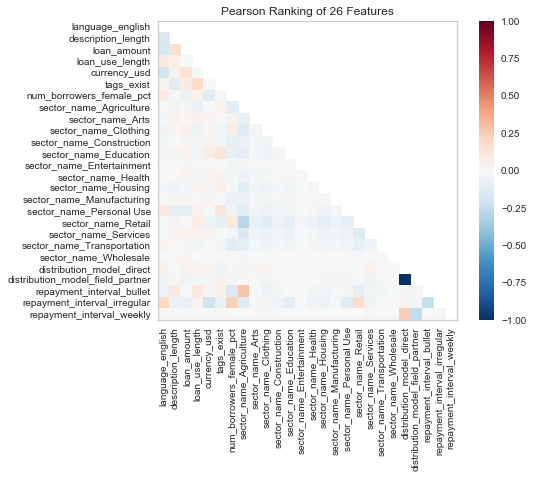

In [24]:
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=X.columns, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

In [78]:
X=X.drop('distribution_model_direct', axis=1)

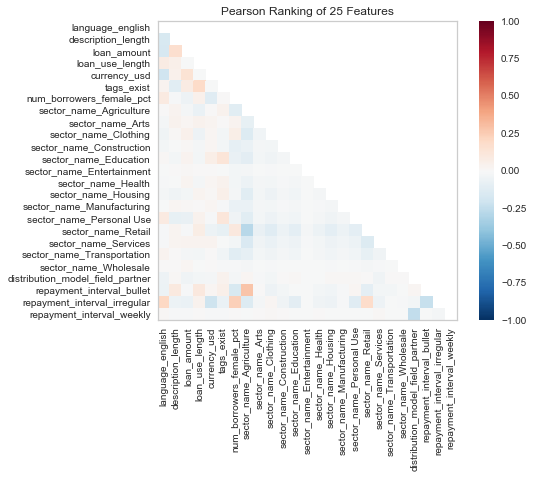

In [79]:
visualizer = Rank2D(features=X.columns, algorithm='pearson')

visualizer.fit(X, y)                
visualizer.transform(X)            
visualizer.poof()       

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [18]:
model = Lasso(alpha=0.5)
sfm = SelectFromModel(model)
sfm.fit(X, y)
print(list(X.iloc[:, sfm.get_support(indices=True)]))

['description_length', 'loan_amount', 'loan_use_length']


In [19]:
model = Ridge()
sfm = SelectFromModel(model)
sfm.fit(X, y)
print(list(X.iloc[:, sfm.get_support(indices=True)]))

['tags_exist', 'num_borrowers_female_pct', 'sector_name_Arts', 'sector_name_Education', 'sector_name_Health', 'sector_name_Manufacturing', 'sector_name_Personal Use', 'distribution_model_direct', 'distribution_model_field_partner']


In [20]:
model = ElasticNet()
sfm = SelectFromModel(model)
sfm.fit(X, y)
print(list(X.iloc[:, sfm.get_support(indices=True)]))

['description_length', 'loan_amount', 'loan_use_length']


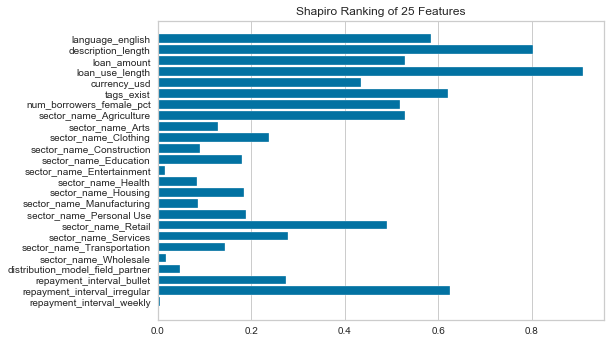

In [102]:
from yellowbrick.features import Rank1D

visualizer = Rank1D(features=X.columns, algorithm='shapiro')

visualizer.fit(X, y)                
visualizer.transform(X)         
visualizer.poof()                     

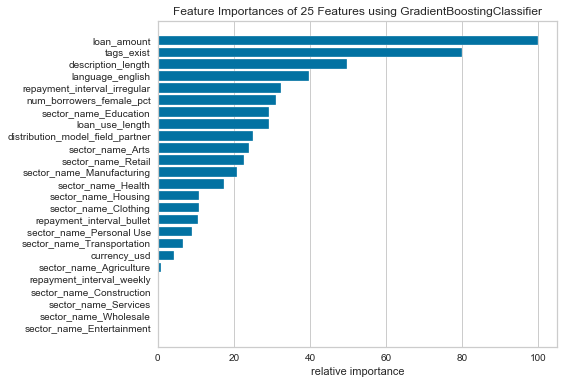

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

from yellowbrick.features.importances import FeatureImportances

fig = plt.figure()
ax = fig.add_subplot()

viz = FeatureImportances(GradientBoostingClassifier(), ax=ax)
viz.fit(X, y)
viz.poof()

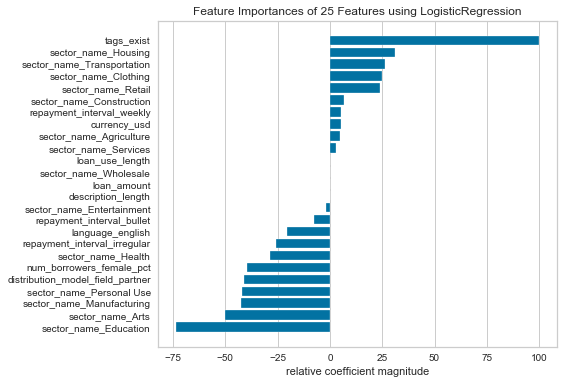

In [104]:
from sklearn.linear_model import LogisticRegression

fig = plt.figure()
ax = fig.add_subplot()

viz = FeatureImportances(LogisticRegression(), ax=ax)
viz.fit(X, y)
viz.poof()

# Train and Test

In [29]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

In [83]:
scaler=StandardScaler()

In [84]:
X_train=scaler.fit_transform(X_train)

In [85]:
X_test=scaler.transform(X_test)

# Check balance in train and test data

In [32]:
y.value_counts(normalize=True)

1    0.535491
0    0.464509
Name: fol, dtype: float64

In [33]:
y_train.value_counts(normalize=True)

1    0.535614
0    0.464386
Name: fol, dtype: float64

In [34]:
y_test.value_counts(normalize=True)

1    0.534995
0    0.465005
Name: fol, dtype: float64

# Model 1: Naive Approach

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
nb = GaussianNB()

In [37]:
nb.fit(X_train, y_train)

GaussianNB(priors=None)

In [44]:
expected   = y_test
predicted  = nb.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=['FOL','MTF'])
print(classificationReport)

             precision    recall  f1-score   support

        FOL       0.52      0.83      0.64    109498
        MTF       0.69      0.34      0.45    125979

avg / total       0.61      0.56      0.54    235477



# Model 2: Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [109]:
lr = LogisticRegression()

In [110]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
expected   = y_test
predicted  = lr.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=['FOL','MTF'])
print(classificationReport)

             precision    recall  f1-score   support

          0       0.63      0.63      0.63    109498
          1       0.68      0.68      0.68    125979

avg / total       0.65      0.65      0.65    235477



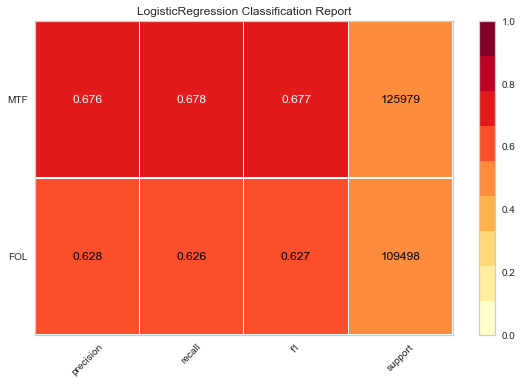

In [116]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(lr, ax=ax, classes=['FOL', 'MTF'], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

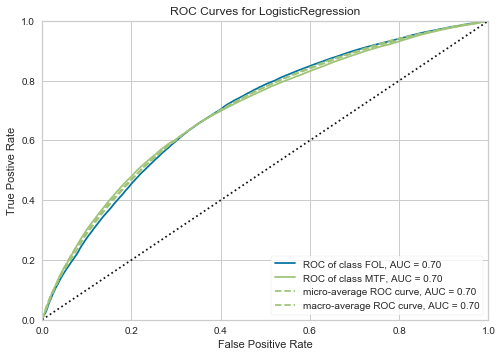

In [118]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(LogisticRegression(), classes=['FOL', 'MTF'])

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
g = visualizer.poof()

# Model 3: Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier(n_estimators=100)

In [48]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
expected   = y_test
predicted  = rf.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=['FOL','MTF'])
print(classificationReport)

             precision    recall  f1-score   support

        FOL       0.62      0.60      0.61    109498
        MTF       0.66      0.68      0.67    125979

avg / total       0.65      0.65      0.65    235477



# Model 4: SVM

In [50]:
from sklearn.svm import LinearSVC

In [51]:
svc = LinearSVC()

In [52]:
svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [54]:
expected   = y_test
predicted  = svc.predict(X_test)

classificationReport = classification_report(expected, predicted, target_names=['FOL','MTF'])
print(classificationReport)

             precision    recall  f1-score   support

        FOL       0.51      0.89      0.65    109498
        MTF       0.72      0.24      0.37    125979

avg / total       0.62      0.55      0.50    235477



# Model 5: LDA

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [56]:
lda = LDA(n_components=2)

In [88]:
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [89]:
expected   = y_test
predicted  = lda.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=['FOL','MTF'])
print(classificationReport)

             precision    recall  f1-score   support

        FOL       0.62      0.63      0.63    109498
        MTF       0.68      0.67      0.67    125979

avg / total       0.65      0.65      0.65    235477



# Model 6: Gradient Boosting

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
gbc = GradientBoostingClassifier()

In [90]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [91]:
expected = y_test
predicted  = gbc.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=['FOL','MTF'])
print(classificationReport)

             precision    recall  f1-score   support

        FOL       0.64      0.64      0.64    109498
        MTF       0.69      0.69      0.69    125979

avg / total       0.67      0.67      0.67    235477



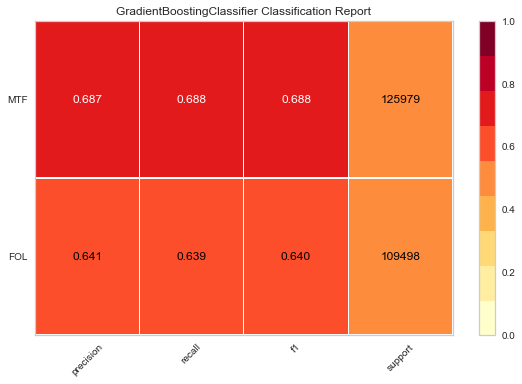

In [117]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(gbc, ax=ax, classes=['FOL', 'MTF'], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

# Model 7: MLP

In [63]:
from sklearn.neural_network import MLPClassifier

In [64]:
mlp=MLPClassifier(alpha=1)

In [95]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [96]:
expected = y_test
predicted  = mlp.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=['FOL','MTF'])
print(classificationReport)

             precision    recall  f1-score   support

        FOL       0.64      0.61      0.63    109498
        MTF       0.68      0.70      0.69    125979

avg / total       0.66      0.66      0.66    235477



# Model 8: Bagging

In [71]:
from sklearn.ensemble import BaggingClassifier

In [99]:
bc=BaggingClassifier(n_estimators=100, oob_score=10)

In [100]:
bc.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=1, oob_score=10, random_state=None,
         verbose=0, warm_start=False)

In [101]:
expected = y_test
predicted  = bc.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=['FOL','MTF'])
print(classificationReport)

             precision    recall  f1-score   support

        FOL       0.62      0.61      0.61    109498
        MTF       0.66      0.68      0.67    125979

avg / total       0.64      0.64      0.64    235477

